In [6]:
import pandas as pd

Прочитаем и выведем таблицу для первичного ознакомления

In [7]:
df = pd.read_csv('/datasets/data.csv')
print(df.head())

   children  days_employed  dob_days education  education_id  \
0         1   -8437.673028        42    высшее             0   
1         1   -4024.803754        36   среднее             1   
2         0   -5623.422610        33   Среднее             1   
3         3   -4124.747207        32   среднее             1   
4         0  340266.072047        53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  


Для работы по поставленному заданию потребуются библиотеки pymystem3 и collections
Загружаем нужные функции

In [3]:
from collections import Counter
from pymystem3 import Mystem

Для начала приведем в опрядок название столбцов таблицы чтобы они были более читаемы
    * Колонку dob_days называем просто как Old

In [8]:
new_names = ['children','days_employed','old','education','education_id','family_status','family_status_id','gender','income_type','debt','total_income','purpose']
df.set_axis(new_names, axis = 'columns', inplace = True)
# Проверяем, что колонки назвались в соответствие в назначеными названиями
print(df.columns)


Index(['children', 'days_employed', 'old', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


Вызываем информацию о таблице чтобы понять в каких типах храняться измерения

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
old                 21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Заметим, что в таблице присутствуют NaN по этому запросим сколько их и в каких столбцах

In [10]:
print(df.isnull().sum())

children               0
days_employed       2174
old                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


 После исследования можно заметить, что значение Null применимо только для 2 столбцов таблицы а именно: "трудовой стаж" и "доход".
 Так как я вижу столбец доход а он для задачи определяющий, проверку я начну с него

In [11]:
df_null = df[(df['total_income'].isnull())]
print(df_null[['days_employed','total_income']])

       days_employed  total_income
12               NaN           NaN
26               NaN           NaN
29               NaN           NaN
41               NaN           NaN
55               NaN           NaN
65               NaN           NaN
67               NaN           NaN
72               NaN           NaN
82               NaN           NaN
83               NaN           NaN
90               NaN           NaN
94               NaN           NaN
96               NaN           NaN
97               NaN           NaN
120              NaN           NaN
121              NaN           NaN
135              NaN           NaN
141              NaN           NaN
145              NaN           NaN
174              NaN           NaN
181              NaN           NaN
189              NaN           NaN
205              NaN           NaN
220              NaN           NaN
241              NaN           NaN
242              NaN           NaN
247              NaN           NaN
250              NaN

Проверка показала, что все значения NaN столбика "year_employed" коррелируются с значением NaN столбика "total_income"
Удалям все значения Null

Это скорее всего отказы по кредитам

<font color='green'> Я решил удалить все значения так как поле "сумма заработка" определяющее для решения о выдачи кредита в дальнейшем. Его конечно можно заменить на усредненные значения даже разбив по группам, что то вроде: Вот выборка госслужащих вот их массив окладов и возьмем среднее так же и по стажу, но эти данные могут сильно повлиять на конечный вывод так как строк давольно много (10.1%) для данного статистического анализа. Кто это? и почему данные такие, вредя ли можно понять с той точностью с которой можно дальше использовать в анализе</font>

In [12]:
df.dropna(subset = ['days_employed'], inplace = True)
df.reset_index(drop=True)

,children,days_employed,old,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Проверяем количество записей с значением NaN

In [13]:
print(df.isnull().sum())

children            0
days_employed       0
old                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Добавлю еще одно поле "stat" и заполню его единицей чтобы удобно группировать выборку если потребуется работа с всеми данными.
Можно будет смотреть зависимости по численности людей с группированных в определенной выборке.

In [15]:
df['stat'] = 1

взглянем на талбицу

In [14]:
print(df.head())

   children  days_employed  old education  education_id     family_status  \
0         1   -8437.673028   42    высшее             0   женат / замужем   
1         1   -4024.803754   36   среднее             1   женат / замужем   
2         0   -5623.422610   33   Среднее             1   женат / замужем   
3         3   -4124.747207   32   среднее             1   женат / замужем   
4         0  340266.072047   53   среднее             1  гражданский брак   

   family_status_id gender income_type  debt   total_income  \
0                 0      F   сотрудник     0  253875.639453   
1                 0      F   сотрудник     0  112080.014102   
2                 0      M   сотрудник     0  145885.952297   
3                 0      M   сотрудник     0  267628.550329   
4                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование 

Удоставеревшись в своем предположение видим, что после очистки строк с значением  NaN в столце с стажем исчезают все значения и по окладу
Констатируем, что мы избавились от пустых значений

Следом может потребоваться удаление дубликатов но так как мы пока не выбрали модель исследования и может количественные показатели по опраеделенной группе будут играть роль то метод drop_duplicates() оставим на потом. а пока просто проверим сколько таких строк в таблице

In [12]:
df.duplicated().sum()
#df = df.drop_duplicates().reset_index(drop=True)

0

Проверим есть ли мусор в значение пол. 

In [16]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [17]:
df.groupby('gender')['stat'].sum()

gender
F      12752
M       6598
XNA        1
Name: stat, dtype: int64

Значение с "XNA" не играет никакой роли тем более, что вопросы к заданию не учитывают ничего, что касается "пола"

Теперь можно заняться очисткой таблицы с лево на право
    - Стаж (Напишим функцию которая посчитает сколько лет работает человек)
    
    ! в таблице есть значения нескольких типов и при изучение полной таблицы было замечено, что реальный стаж в днях идет с знаком "минус" который при деление на 365 дней дает рабочее коррелируемое значения для людей подходящего возраста и занятости но для "Пенсионеров" установлены значения в цифрах порядков 1000 лет и из чего я делаю вывод, что эти значения считаю как бесконечность так как для пенсионеров не интересен их прошлый трудовой стаж ну или эти данные не были предоставлены заказчиком.
    
    - Образование (приводим все записи к нижниму регистру)
    
    ! можно заметить, что тут банальная проблема с Регистром от чего значения строки считаются не уникальными.
    
    - Цель кредита (приводим все записи к нижниму регистру)

Я привожу все числа в целочисленный вид, сотые доли обхема кредита в этом исследование мне не так важны так что оставляем
с значением int так как оно на сколько я понимаю весит меньше и более понятно при интерпритированиее функций сравнения т.е. обработка таблицы будет происходить быстрее. Тоже самое делаем для возраста, в нем доли соответсвенно так же не нужны.

In [18]:
days_of_year = int(356.25)

df['days_employed'] = -(df['days_employed'] / days_of_year)

df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')


df['education'] = df['education'].str.lower()
df['purpose'] = df['purpose'].str.lower()


<font color='green'> Мне кажется, что поле рассчитано из какой то уже существующей банковской формулы которая возвращает вот такие странные цифры когда у работающего человека дни идут за минусом а у пенсионера порядок цифр от 900 лет. И так как мне кажется, что это просто формула и знак минус появился в ней при расчитанной выгрузки то для последедующей группировки и и анализа лучше иметь удобочитаемые данные по этому я и возвращаю этому числу положительное значение. Что касается чисел для "пенсионеров" то их можно засчитать как NaN </font>

<font color='violet'> Комментарий от наставника: Хорошо, логика ясна.  </font>

In [ ]:
df.loc[df['old'] < 0, 'old'] = 'NaN'

Можем проверить сколько вообще разных значений присутствует в таблице под столбиком "цель"

In [20]:
uniq_perpus = df['purpose'].unique().sum()
print(uniq_perpus)

покупка жильяприобретение автомобилядополнительное образованиесыграть свадьбуоперации с жильемобразованиена проведение свадьбыпокупка жилья для семьипокупка недвижимостипокупка коммерческой недвижимостипокупка жилой недвижимостистроительство собственной недвижимостинедвижимостьстроительство недвижимостина покупку подержанного автомобиляна покупку своего автомобиляоперации с коммерческой недвижимостьюжильеоперации со своей недвижимостьюавтомобилизаняться образованиемполучение образованиясделка с подержанным автомобилемавтомобильсвадьбаполучение дополнительного образованияпокупка своего жильяоперации с недвижимостьюполучение высшего образованиясвой автомобильсделка с автомобилемпрофильное образованиевысшее образованиепокупка жилья для сдачина покупку автомобилястроительство жилой недвижимостиремонт жильюзаняться высшим образованием


In [21]:
from pymystem3 import Mystem
from collections import Counter

m = Mystem()
lemmas = m.lemmatize(uniq_perpus)
#print(lemmas)
print(Counter(lemmas))

Counter({' ': 59, 'с': 5, 'покупка': 4, 'свой': 3, 'жилье': 2, 'для': 2, 'недвижимостипокупка': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'высокий': 2, 'жильяприобретение': 1, 'автомобилядополнительный': 1, 'образованиесыграть': 1, 'свадьбуоперация': 1, 'жильемобразованиен': 1, 'проведение': 1, 'свадьбыпокупка': 1, 'семьипокупка': 1, 'недвижимостистроительство': 1, 'собственный': 1, 'недвижимостинедвижимостьстроительство': 1, 'недвижимостина': 1, 'автомобиляна': 1, 'автомобиляоперация': 1, 'недвижимостьюжильеоперация': 1, 'со': 1, 'недвижимостьюавтомобилизаняться': 1, 'образованиемполучение': 1, 'образованиясделка': 1, 'автомобилемавтомобильсвадьбаполучение': 1, 'дополнительный': 1, 'образованияпокупка': 1, 'жильяоперация': 1, 'недвижимостьюполучение': 1, 'образованиясва': 1, 'автомобильсделка': 1, 'автомобилемпрофильный': 1, 'образованиевысший': 1, 'образованиепокупка': 1, 'сдачина': 1, 'автомобилястроительство': 1, 'недвижимостиремонт': 1, 'жильюзаняться': 1, 'образование': 1

Из текста мы видим, что основные направления это жилье/недвижимость, автомобиль, образование и свадьба.
Напишим функцию которая будет делить на категории строки таблицы: 
    * Авто
    * Недвижимость
    * Образование
    * Свадьба
    * Прочее

In [22]:
from nltk.stem import SnowballStemmer
from pymystem3 import Mystem
from collections import Counter

def count_category_purpose(df):

    m = Mystem()
    Words_array = []
    
    for index, row in df.iterrows():
        
        item_col = row['purpose']
        lemmas = m.lemmatize(item_col)
        
        for oh_word in lemmas:
            Words_array.append(oh_word)
            
    return Words_array        
               

In [23]:
words_array = count_category_purpose(df)

s = pd.Series(words_array, name='purposeValue')
print(s.value_counts().head(10))

                30248
\n              19351
недвижимость     5723
покупка          5353
жилье            4035
автомобиль       3897
образование      3597
с                2619
операция         2334
свадьба          2099
Name: purposeValue, dtype: int64


<font color='green'> Как мы видим из счетчика процедуры count_category_purpose(). Так как на первых местах у нас стоит "недвижимость" в размере 5723 слова в датафрейме, далее идет слово "покупка" но она нас не так сильно интересует так не существительное. А все остальные слова дают понять, что всего категорий не так много. Второе место "жилье" - 4035, третье место "автомобиль" - 3897 далее идет "образование" - 3597 и "свадьба" - 2099  </font>

In [24]:
from nltk.stem import SnowballStemmer
from pymystem3 import Mystem

def category_of_purpose():
    
    m = Mystem()
   
    for index, row in df.iterrows():
        
        item_col = row['purpose']
        lemmas = m.lemmatize(item_col)
        
        if 'автомобиль' == lemmas[0] or 'недвижимость' == lemmas[0] or 'образование' == lemmas[0] or 'свадьба' == lemmas[0]:
            continue
        elif 'автомобиль' in lemmas: 
            w = 'авто'
        elif 'недвижимость' in lemmas or 'жилье' in lemmas:
            w = 'недвижимость'
        elif 'образование' in lemmas:
            w = 'образование'
        elif 'свадьба' in lemmas:
            w = 'свадьба'    
        else:
            w = 'прочее'
            
        df['purpose'] = df['purpose'].replace(item_col, w)     

In [25]:
category_of_purpose()

In [26]:
print(df.head())

   children  days_employed  old education  education_id     family_status  \
0         1             23   42    высшее             0   женат / замужем   
1         1             11   36   среднее             1   женат / замужем   
2         0             15   33   среднее             1   женат / замужем   
3         3             11   32   среднее             1   женат / замужем   
4         0           -955   53   среднее             1  гражданский брак   

   family_status_id gender income_type  debt  total_income       purpose  stat  
0                 0      F   сотрудник     0        253875  недвижимость     1  
1                 0      F   сотрудник     0        112080          авто     1  
2                 0      M   сотрудник     0        145885  недвижимость     1  
3                 0      M   сотрудник     0        267628   образование     1  
4                 1      F   пенсионер     0        158616       свадьба     1  


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 13 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
old                 19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int64
purpose             19351 non-null object
stat                19351 non-null int64
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


Найдем всех кто не отдавал кредит из нашей выборки

In [27]:
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)

df['debt'] = df['debt'].astype('str')
df['debt'] = df['debt'].replace('1', 'isdebt')
df['debt'] = df['debt'].replace('0', 'ontime')

In [28]:
ungive_credit_info = df.loc[df['debt'] == 1]

In [29]:
give_credit_info = df.loc[df['debt'] == 0]

Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [30]:
# те что не отдали кредит
ungive_credit_info.groupby('children')['debt'].sum()

Series([], Name: debt, dtype: float64)

In [31]:
# те что не отдали кредит
give_credit_info.groupby('children')['stat'].sum()

Series([], Name: stat, dtype: int64)

тут мы можем видеть небольшую грязь в данных а именно "-1" и "20" детей. Я принимаю не обращать внимания на эти данных так как они составляют менее одного процента

Мне кажется, грязь в данных вроде "-1" и "20" Это не что иное как "1" и "2" или "0"

Соберем таблицу для того чтобы наглядно посмотреть на тенденции от тех отдавал в срок и нет и как это зависит от количества детей

In [32]:
data = [['0', 952+4, 11758+29],
       ['1', 408+1,  3935+43],
       ['2',177+4,  1674+30],
       ['3', 22,  272],
       ['4', 3,  31],
       ['5', 0,  8]]
columns = ['children', 'count_debt', 'count_undebt']
table = pd.DataFrame(data=data,columns=columns)

table['ratio'] = table['count_undebt'] / table['count_debt']

print(table)

  children  count_debt  count_undebt      ratio
0        0         956         11787  12.329498
1        1         409          3978   9.726161
2        2         181          1704   9.414365
3        3          22           272  12.363636
4        4           3            31  10.333333
5        5           0             8        inf


In [56]:
table = df.pivot_table (index=['children'], columns= 'debt', values=['stat'], aggfunc='sum')
#table['ratio'] = table['ontime'] / table['isdebt']
print(table)

           stat         
debt     isdebt   ontime
children                
0         952.0  11758.0
1         409.0   3978.0
2         185.0   1733.0
3          22.0    272.0
4           3.0     31.0
5           NaN      8.0


<font color='green'> Из этой таблице мы выяснили, что чем меньше у человека детей тем он чаще берет кредит и так же возврат в срок пропорционален таблице.
    
    Самыми надежными заемщиками оказались люди имеющие от 1 до 2 детей. У них меньше всего "задержек" оп возврату на основной объем кредитов в этих категориях. Если люди с одним ребенком взяли 4387 то задержали кредит всего лишь 9% заемщиков. Похожая ситуация и с людьми имеющие 2 детей к 1918 единицам, процент плохих всего 9,65 %.
    
    Люди в категориях 3 и 4 ребенка имеют худшую динамику по соотношению по возвратам, но и объем в своей общей массе не велик за счет чего и достигается небольшой процент.
        * для 3 детей на общий объем в 294 кредита не отдали в срок 7.48%
        * для 4 детей на общий объем в 34 кредита не отдали в срок 8.82%
        
     Самая интересная категория это люди без детей там сравнительно большое соотношение двух категорий но процент плохих займов всего 7.47% если учесть объем заемов (всего 12 743) то это самая лучшая категория для выдачи кредита.

</font>

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
# те что не отдали кредит
ungive_credit_info.groupby('family_status')['debt'].sum()
#ungive_credit_info.sort_values(by = 'debt', ascending = False)

Series([], Name: debt, dtype: float64)

In [33]:
# те что отдали кредит
give_credit_info.groupby('family_status')['stat'].sum()
#give_credit_info.sort_values(ascending = False)

Series([], Name: stat, dtype: int64)

In [34]:
data = [['Не женат / не замужем', 254, 2271],
       ['в разводе', 76,  1007],
       ['вдовец / вдова', 56,  809],
       ['гражданский брак', 339,  3396],
       ['женат / замужем', 846,  10297]]

columns = ['family_status', 'count_debt', 'count_undebt']
table = pd.DataFrame(data=data,columns=columns)


#table.sort_values('count_debt', ascending = True) 
#table.groupby('family_status')['count_debt']

table['ratio'] = table['count_undebt'] / table['count_debt']

table_sort = table.sort_values(['count_debt'], ascending = False)

print(table_sort)

           family_status  count_debt  count_undebt      ratio
4        женат / замужем         846         10297  12.171395
3       гражданский брак         339          3396  10.017699
0  Не женат / не замужем         254          2271   8.940945
1              в разводе          76          1007  13.250000
2         вдовец / вдова          56           809  14.446429


In [35]:
table = df.pivot_table (index=['family_status'], columns= 'debt', values=['stat'], aggfunc='sum')
#table.sort_values('ontime', ascending=False)
#table['ratio'] = table['ontime'] / table['isdebt']
print(table)

                        stat       
debt                  isdebt ontime
family_status                      
Не женат / не замужем    254   2271
в разводе                 76   1007
вдовец / вдова            56    809
гражданский брак         339   3396
женат / замужем          846  10297


<font color='green'> Здесь мы видим, что пропорция от обещго числа выданных кредитов сохраняется. 
    Из таблицу по распределению семеного положения кредетуемых видно, что люди в браке готовы неотдавать в срок кредит чаще чем люди которые никогда в браке не были. Это про ответсвенность, если мы прибавим к этому объем кредитования то будет немного другая картина. Становится ясно, что люди в браке берут кредит чаще чем холостые если учесть отчет по количеству детей, где самыми ответсвенными были люди имеющие 1 или 2 детей то становится понятно, что в совокупности эти это более благоприятный заемщик для банка.
    
    * женат / замужем общий объем кредитов состовляет 11143 процент не возврата состовляет 7,59%
    * гражданский брак (3735 и 9%)
    * в разводе (1083 и 7%)
    * не женат / не замужем (2525 и 10%)
    * вдова / вдовец (865 и 6.47%)
    
И что касается пропорции. Цифры получаются более интересные: самое большое число неотданных кредитов на общую массу будет у категории "Вдовец/Вдова" и "В разводе" а самые ответветсвенные оказались люди необременные печатью в паспорте. </font>

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

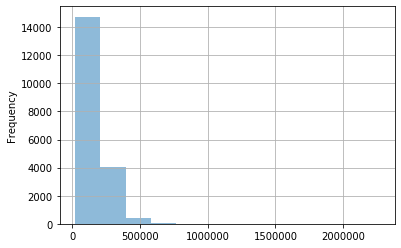

In [51]:
import matplotlib.pyplot as plt

df['total_income'].plot.hist(bins=12, alpha=0.5, grid =100)

Уровень дохода мне кажется надо поделить на категории от и до и также заменить в таблице значениями по категории

* от 0 до 30
* от 30 до 60
* от 60 до 100
* от 100 до 150
* от 150 до 200
* от 200 до 300
* от 300 и 500
* от 500 и 1000000
* 1000000 и более


Я эти категории придумал сам основываясь только из удобочитаемой и более менее разделенной таблицы

<font color='green'> Первое, что мне пришло в голову это сделать Гистограмму (Если создание дополнительных столбцов не так хорошо :) ). Правда пока я её не обуздал и не так хорошо разбираюсь как из нее сделать более читаемую (с меньшими значениеями по оси X) </font>

In [37]:
def cat_inc(count_1, count_2, debt):
    
    table_filt = df[(df['total_income'] > count_1) & (df['total_income'] <= count_2) & (df['debt'] == debt)]
    table_count = table_filt['stat'].sum()
    
    return table_count


In [45]:
data = [['от 0 до 30', cat_inc(0, 30000, 'isdebt'), cat_inc(0, 30000, 'ontime')],
       ['от 30 до 60', cat_inc(30001, 60000, 'isdebt'),  cat_inc(30001, 60000, 'ontime')],
       ['от 60 до 100', cat_inc(60001, 100000, 'isdebt'),  cat_inc(60001, 100000, 'ontime')],
       ['от 100 до 150', cat_inc(100001, 150000, 'isdebt'),  cat_inc(100001, 150000, 'ontime')],
       ['от 150 до 200', cat_inc(150001, 200000, 'isdebt'),  cat_inc(150001, 200000, 'ontime')],
       ['от 200 до 300', cat_inc(200001, 300000, 'isdebt'),  cat_inc(200001, 300000, 'ontime')],
       ['от 300 до 500', cat_inc(300001,500000, 'isdebt'),  cat_inc(300001,500000, 'ontime')],
       ['от 500 до 1 млн.', cat_inc(500001,1000000, 'isdebt'),  cat_inc(500001,1000000, 'ontime')],
       ['более 1 млн.', cat_inc(1000001, 10000000000, 'isdebt'),  cat_inc(1000001, 10000000000, 'ontime')]]

columns = ['total_income', 'count_debt', 'count_undebt']
table = pd.DataFrame(data=data,columns=columns)

#table.sort_values('count_debt', ascending = True) 
#table.groupby('family_status')['count_debt']

table['ratio'] = table['count_undebt'] / table['count_debt']

table_sort = table.sort_values(['count_debt'], ascending = False)

print(table_sort)

       total_income  count_debt  count_undebt      ratio
3     от 100 до 150         491          5213  10.617108
4     от 150 до 200         368          3749  10.187500
2      от 60 до 100         305          3352  10.990164
5     от 200 до 300         252          3331  13.218254
6     от 300 до 500          92          1168  12.695652
1       от 30 до 60          47           737  15.680851
7  от 500 до 1 млн.          12           185  15.416667
0        от 0 до 30           2            20  10.000000
8      более 1 млн.           2            23  11.500000


<font color='green'> Вывод: Видим самые плохие отдачи в категориях "от 30 до 60" и "от 500 до 1 млн." при небольших цифрах объемов заема 784 и 197 соответсвенно. В обоих группах соотшение к возврату 15/1, что давольно много, но так как объем выданых кредитов небольшой это неявлеяется какой то самой экстримальной группой. 
        
Таблица говорит, что самый рискованые категории при возврате кредита в основном ежемесячный заработок людей в районе 100 - 150. Общий объем кредитов около 30% от всего и там же самый большой процент не просрочек, что впринципе нормально на объем в 5700 кредитов было просрочено 491. 

На мой взгляд самая плохая категория это "от 200 до 300" у них плохое соотношение к возвратам и просрочкам на 3500 кредитов были задолжности по каждому 15 выданному кредиту </font>

<font color='green'> Если честно, я не представляю как сделать такую таблицу через pivot_table().</font>

Как разные цели кредита влияют на его возврат в срок?

In [39]:
# те, что не отдали кредит
ungive_credit_info.groupby('purpose')['debt'].sum()
#ungive_credit_info.sort_values(ascending = False)

Series([], Name: debt, dtype: float64)

In [40]:
# те, что отдали кредит
give_credit_info.groupby('purpose')['stat'].sum()
#give_credit_info.sort_values(ascending = False)

Series([], Name: stat, dtype: int64)

In [41]:
data = [['недвижимость', 715, 9043],
       ['авто', 367,  3530],
       ['образование', 331,  3266],
       ['свадьба', 158,  1941]]

columns = ['family_status', 'count_debt', 'count_undebt']
table = pd.DataFrame(data=data,columns=columns)

#table.sort_values('count_debt', ascending = True) 
#table.groupby('family_status')['count_debt']

table['ratio'] = table['count_undebt'] / table['count_debt']
table_sort = table.sort_values(['count_debt'], ascending = False)

print(table_sort)

  family_status  count_debt  count_undebt      ratio
0  недвижимость         715          9043  12.647552
1          авто         367          3530   9.618529
2   образование         331          3266   9.867069
3       свадьба         158          1941  12.284810


In [44]:
df['purpose'] = df['purpose'].replace('автомобили', 'авто')  
df['purpose'] = df['purpose'].replace('автомобиль', 'авто')  

table = df.pivot_table (index=['purpose'], columns= 'debt', values=['stat'], aggfunc='sum')
print(table)

               stat       
debt         isdebt ontime
purpose                   
авто            367   3530
недвижимость    715   9043
образование     331   3266
свадьба         158   1941


Вывод: Опять видна пропорция к количеству кредитов вообще. Таблица спускается с самого дорого более дешевый кредит Недвижимость - Свадьба. Самое интересное, что пропорция плохих кредитов к хорошим наблюдается на самой популярной категории и на самой наименее популярной как свадьба (зачем вообще на нее брать кредит)

In [63]:
table = df.pivot_table (index=['family_status','children','purpose',], columns= 'debt', values=['stat'], aggfunc='sum')
#table = table.loc[table['isdebt'] > 100]
#print(table.sort_values('isdebt', ascending=False))
print(table)

                                              stat        
debt                                        isdebt  ontime
family_status         children purpose                    
Не женат / не замужем 0        авто           57.0   404.0
                               недвижимость   87.0  1066.0
                               образование    48.0   372.0
                      1        авто           13.0    71.0
                               недвижимость   28.0   208.0
                               образование    10.0    81.0
                      2        авто            5.0    14.0
                               недвижимость    3.0    37.0
                               образование     1.0    12.0
                      3        авто            NaN     4.0
                               недвижимость    1.0     NaN
                               образование     NaN     2.0
                      4        недвижимость    1.0     NaN
в разводе             0        авто           12.0   159

<font color='green'> Если мы собирем все исселедуемые данные в сводном отчете мы увидим, что портрет самого интересного активного заемщика это люди состоящие в браке пока не имеющие детей берущие кредит на покупку недвижимости это самая болшая цифра по объемам кредитов из общей корзины (3828) или почти 20%  Дальше идет автомобиль и образование
    
    Тенденция Недвижимость - автомобиль - образование прослеживается во всех группах а процентно соответсвует 60%, 15%, 15% и 10% свадьба
    
    Самое интересное, что с появление 1 или 2 го ребенка ответственность в возврате кредита возрастает а с появлением 3 и 4  могут быть просрочки чаще
    
    Люди в браке берут кредитов больше чем все остальные категории, но и суммарный объем заработка у таких людей больше.
    
    Весь объем кредитов на свадьбу присутствует только в статусе "гражданский брак" и составляет всего 1941 кредит
    
</font>